In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('sales.csv')
data.head()

,Date,Amount
0,1/1/2000,510
1,2/1/2000,515
2,3/1/2000,530
3,4/1/2000,527
4,5/1/2000,519


In [3]:
data.tail()

,Date,Amount
103,8/1/2008,766
104,9/1/2008,703
105,10/1/2008,644
106,11/1/2008,604
107,12/1/2008,630


In [4]:
data['Date']=pd.to_datetime(data['Date'])

In [5]:
data.tail()

,Date,Amount
103,2008-08-01,766
104,2008-09-01,703
105,2008-10-01,644
106,2008-11-01,604
107,2008-12-01,630


In [6]:
data.set_index('Date',inplace=True)
data.head()

,Amount
Date,
2000-01-01,510
2000-02-01,515
2000-03-01,530
2000-04-01,527
2000-05-01,519


<AxesSubplot:xlabel='Date'>

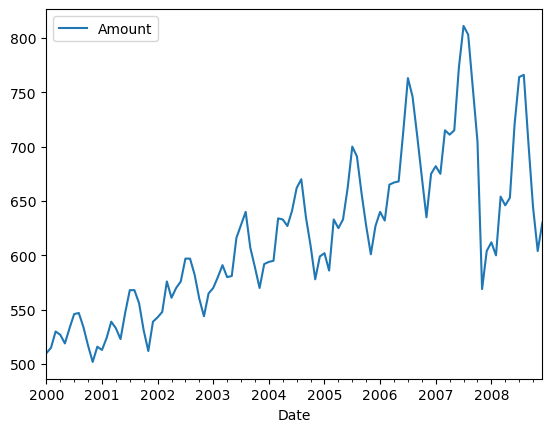

In [7]:
data.plot()

In [8]:
from statsmodels.tsa.stattools import adfuller

In [10]:
def adf_test(d):
    result=adfuller(d)
    print('P value ->',result[1])
    if result[1] <= 0.05:
        print("Reject the null hypothesis. Data is stationary")
    else:
        print("Accept the null hypothesis, Data is not stationary ")

In [11]:
adf_test(data['Amount'])

P value -> 0.564435209992505
Accept the null hypothesis, Data is not stationary 


In [12]:
data['First Difference']=data['Amount']-data['Amount'].shift(1)

In [13]:
data.head()

,Amount,First Difference
Date,,
2000-01-01,510,NaN
2000-02-01,515,5.0
2000-03-01,530,15.0
2000-04-01,527,-3.0
2000-05-01,519,-8.0


In [14]:
adf_test(data['First Difference'].dropna())

P value -> 0.07478507605167106
Accept the null hypothesis, Data is not stationary 


In [15]:
data['Second Difference']=data['First Difference']-data['First Difference'].shift(1)

In [16]:
data.head()

,Amount,First Difference,Second Difference
Date,,,
2000-01-01,510,NaN,NaN
2000-02-01,515,5.0,NaN
2000-03-01,530,15.0,10.0
2000-04-01,527,-3.0,-18.0
2000-05-01,519,-8.0,-5.0


In [17]:
adf_test(data['Second Difference'].dropna())


P value -> 3.487739917694478e-15
Reject the null hypothesis. Data is stationary


In [17]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

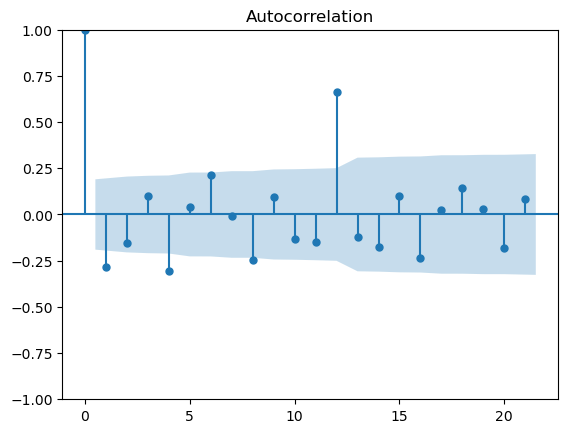

In [18]:
plot1 = plot_acf(data["Second Difference"].dropna())

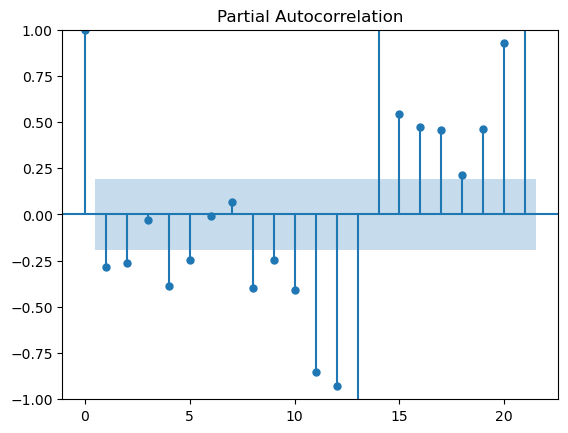

In [19]:
plot2 = plot_pacf(data["Second Difference"].dropna())

In [20]:
data['Seasonal Difference']=data['Amount']-data['Amount'].shift(12)

In [21]:
data

,Amount,First Difference,Second Difference,Seasonal Difference
Date,,,,
2000-01-01,510,NaN,NaN,NaN
2000-02-01,515,5.0,NaN,NaN
2000-03-01,530,15.0,10.0,NaN
2000-04-01,527,-3.0,-18.0,NaN
2000-05-01,519,-8.0,-5.0,NaN
...,...,...,...,...
2008-08-01,766,2.0,-42.0,-37.0
2008-09-01,703,-63.0,-65.0,-51.0
2008-10-01,644,-59.0,4.0,-61.0


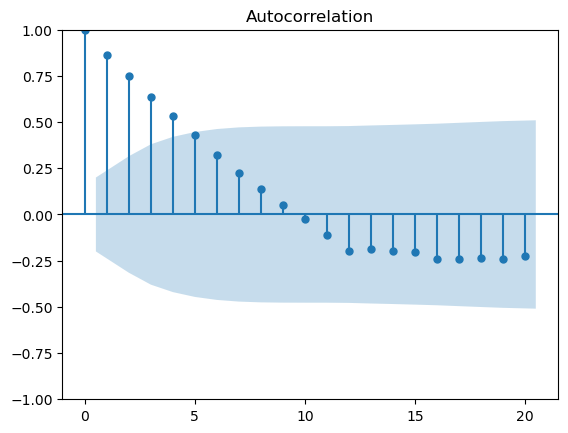

In [22]:
plot3 = plot_acf(data["Seasonal Difference"].dropna())

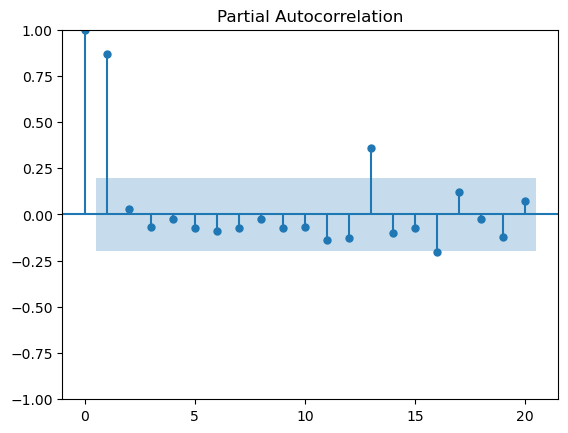

In [23]:
plot4 = plot_pacf(data["Seasonal Difference"].dropna())

In [24]:
from datetime import datetime

In [25]:
train_data=data

In [26]:
train_data

,Amount,First Difference,Second Difference,Seasonal Difference
Date,,,,
2000-01-01,510,NaN,NaN,NaN
2000-02-01,515,5.0,NaN,NaN
2000-03-01,530,15.0,10.0,NaN
2000-04-01,527,-3.0,-18.0,NaN
2000-05-01,519,-8.0,-5.0,NaN
...,...,...,...,...
2008-08-01,766,2.0,-42.0,-37.0
2008-09-01,703,-63.0,-65.0,-51.0
2008-10-01,644,-59.0,4.0,-61.0


In [27]:
from statsmodels.tsa.arima.model import ARIMA
modela=ARIMA(train_data['Amount'],order=(17,2,3))
arima_modal = modela.fit()

In [28]:
predicteda = arima_modal.predict(start=datetime(2003,1,1),end=datetime(2008,12,1))

In [29]:
train_data['Predicted_arima']=predicteda

In [30]:
train_data

,Amount,First Difference,Second Difference,Seasonal Difference,Predicted_arima
Date,,,,,
2000-01-01,510,NaN,NaN,NaN,NaN
2000-02-01,515,5.0,NaN,NaN,NaN
2000-03-01,530,15.0,10.0,NaN,NaN
2000-04-01,527,-3.0,-18.0,NaN,NaN
2000-05-01,519,-8.0,-5.0,NaN,NaN
...,...,...,...,...,...
2008-08-01,766,2.0,-42.0,-37.0,760.077961
2008-09-01,703,-63.0,-65.0,-51.0,736.171884
2008-10-01,644,-59.0,4.0,-61.0,649.999142


<AxesSubplot:xlabel='Date'>

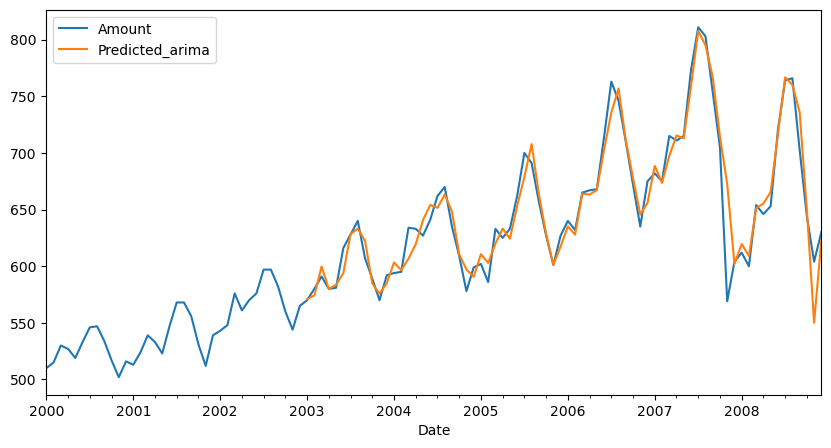

In [31]:
train_data[['Amount','Predicted_arima']].plot(figsize=(10,5))

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [33]:
smodel=SARIMAX(train_data['Amount'],order=(2,0,4),seasonal_order=(0,1,0,12))

In [34]:
model=smodel.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.77670D+00    |proj g|=  1.38732D-02

At iterate    5    f=  3.77393D+00    |proj g|=  1.53239D-02

At iterate   10    f=  3.77081D+00    |proj g|=  1.28056D-02

At iterate   15    f=  3.77042D+00    |proj g|=  4.08841D-03

At iterate   20    f=  3.76953D+00    |proj g|=  3.22747D-03

At iterate   25    f=  3.76951D+00    |proj g|=  4.16261D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     29     35      1     0     0   

 This problem is unconstrained.


In [35]:
predicted = model.predict(start=datetime(2003,1,1),end=datetime(2008,12,1))

In [36]:
train_data['Predicted']=predicted

In [37]:
train_data

,Amount,First Difference,Second Difference,Seasonal Difference,Predicted_arima,Predicted
Date,,,,,,
2000-01-01,510,NaN,NaN,NaN,NaN,NaN
2000-02-01,515,5.0,NaN,NaN,NaN,NaN
2000-03-01,530,15.0,10.0,NaN,NaN,NaN
2000-04-01,527,-3.0,-18.0,NaN,NaN,NaN
2000-05-01,519,-8.0,-5.0,NaN,NaN,NaN
...,...,...,...,...,...,...
2008-08-01,766,2.0,-42.0,-37.0,760.077961,763.089122
2008-09-01,703,-63.0,-65.0,-51.0,736.171884,722.759843
2008-10-01,644,-59.0,4.0,-61.0,649.999142,664.085806


<AxesSubplot:xlabel='Date'>

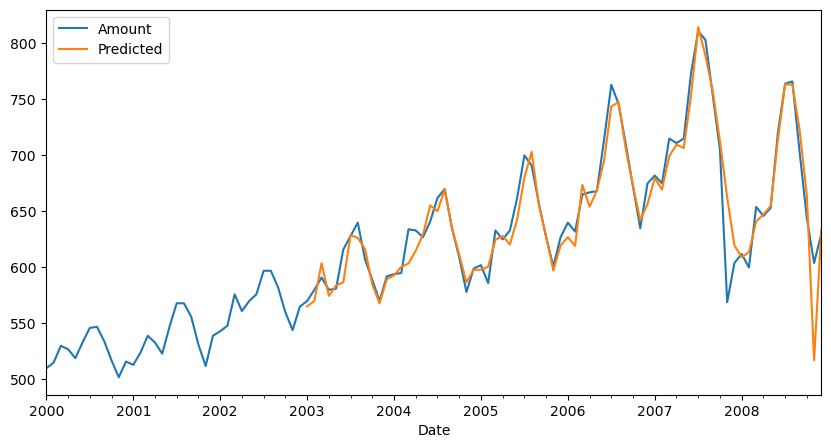

In [38]:
train_data[['Amount','Predicted']].plot(figsize=(10,5))

<AxesSubplot:xlabel='Date'>

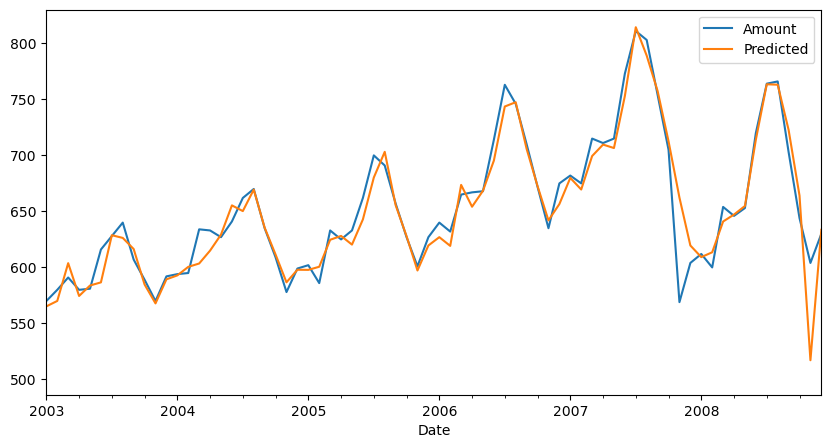

In [39]:
train_data[['Amount','Predicted']].plot(xlim=['2003-01-01','2008-12-01'],figsize=(10,5))

2009-01-01    646.927684
2009-02-01    626.915549
2009-03-01    685.770015
2009-04-01    679.601774
2009-05-01    686.549362
2009-06-01    752.073185
2009-07-01    793.582656
2009-08-01    792.431067
2009-09-01    725.914107
2009-10-01    663.271210
2009-11-01    619.688980
2009-12-01    642.306047
Freq: MS, Name: predicted_mean, dtype: float64

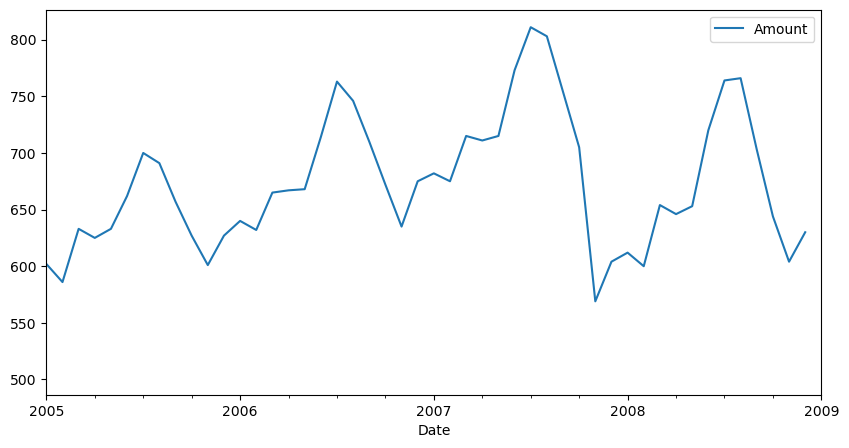

In [40]:
predicted1 = model.predict(start=datetime(2009,1,1),end=datetime(2009,12,1))
train_data['Predicted1']=predicted1
train_data[['Amount']].plot(xlim=['2005-01-01','2009-01-01'],figsize=(10,5))
predicted1

<AxesSubplot:>

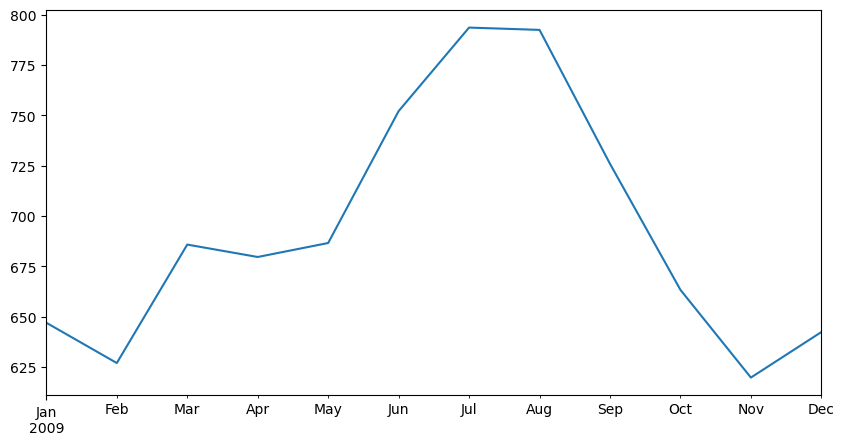

In [41]:
predicted1.plot(figsize=(10,5))